### IMPORT SECTION

In [244]:
#Gül Eda Aydemir
#504201574
#########################
import numpy as np # pip3 install matplotlib
import matplotlib.pyplot as plt # pip3 install matplotlib

import networkx as nx

from networkx import gnm_random_graph, adjacency_matrix
import networkx.algorithms.community as nx_comm
from networkx.algorithms.smallworld import random_reference

import random
import community # can be installed with: "pip install python-louvain"
from numpy import linalg as LA
from tqdm import tqdm
import pandas as pd
from scipy import stats
from scipy.interpolate import interp1d
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import math
import scipy.io as sio
from skimage import data, segmentation, color
from skimage.future import graph

### HYPERPARAMETER SECTION

In [181]:
V = 10  # node count
E = random.randint(V+1, V*3) # edge count

# Creating a random connected directed graph.
G = gnm_random_graph(V, E, seed=1773, directed=True)

# Giving random weights to the G.
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = random.randint(1, 10)

### VISUALIZING THE GRAPH

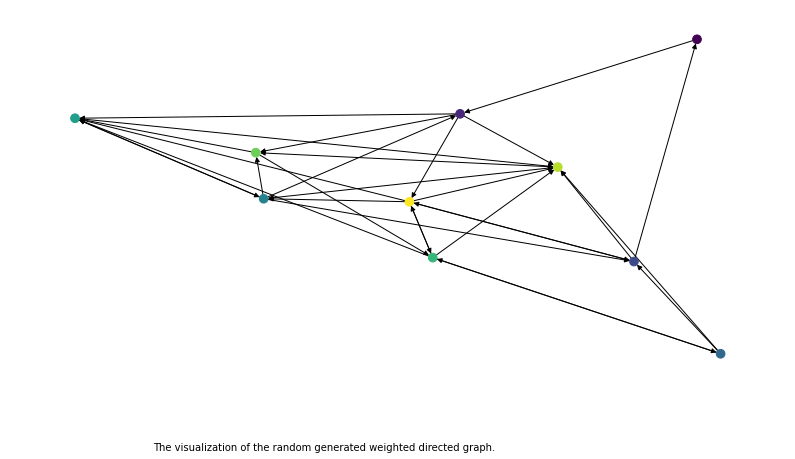

In [182]:
# Creating the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,7))
nx.draw(G, node_color=range(V), node_size=75) # Drawing the graph, assign randomized colors

# Plotting with the caption
fig.text(.27,0,"The visualization of the random generated weighted directed graph.")
plt.show()

In [117]:
# Adjacency Matrix of graph G. 

A = adjacency_matrix(G, nodelist=None, dtype=None, weight='weight')
print(A.todense())

[[ 0  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  9  0  0]
 [ 2  0  0  0  0  0  0  0  8  5]
 [ 0  0  0  0  0  0  6  0 10  0]
 [ 0  8  1  0  0  0  0  8  0  0]
 [ 0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  9  0 10  0  0  3  4]
 [ 0  0  0  0  0  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  0]
 [ 0  0 10  0  1  1  3  0  2  0]]


# 🏁 START POINT OF THE HOMEWORK

## 1️⃣- Bellman-Ford shortest path algorithm [20%]
The Bellman-Ford algorithm is a generalization of Dijkstra’s algorithm to directed graphs with no negative cycles. Given a weighted matrix A of a directed graph G, an element A(i, j) denotes the weight of the edge from node i to node j.

### 🔺 (1.1) Explain the key steps of Bellman-Ford algorithm (one-by-one). [5%]

* Initial node is assigned a path length of zero, while all other nodes are assigned to infinity.
* Start by visiting the neighbors of the initial node. The algorithm stops when all nodes are visited.

    > 0) Initialize path length in each node. <br>
    > 1) From starting node, visit(\**) the node with the smallest known distance/cost.<br>
    > 2) Once we've moved to the smallest-cost node, check each of its neighboring nodes.<br>
    > 3) Calculate the distance/cost for the neighboring nodes by summing the cost of the edges leading from the start node.<br>
    > 4) If the distance/cost to a node we are checking is less than a known distance, update the shortest distance for that vertex.<br>

 ** 1- create a list to keep track of each visited nodes. 2- create a list to keep track of unvisited nodes.
 

### 🔺 (1.2) Write a function called BellmanFordAlgo that takes (i) A and (2) a starting node ID as inputs, and outputs an array as in Graph Theory Blink 5.4a, where each row represents a node in the graph G and comprising three columns (nodes, shortest distance from source input node, previous node). [10%]

In [193]:
def BellmanFordAlgo(A, starting_node_ID): 
    #this function requires Adjacency Matrix (A) and the ID of the starting node, where type of the A is numpy.ndarray. 
    #following data frame code is generated to tidy up the output
    index=[i for i in range (1,len(A)+1)]
    columns=['Node', 'Shortest distance from source node','Previous node']
    Output=pd.DataFrame(columns=columns, index=index)
    #Lets initiliaze the algorithm by assigning infitinity to all nodes except the starting one. 
    #Please note that since python starts indexing from 0,here we use starting_node_ID-1.  
    D=[math.inf]*len(A)
    D[starting_node_ID-1]=0
    #step1 of the algoritm where each edge is relaxed one by one, repeating |V|-1 times.
    for k in range (0, len(A)-1):
        for i in range(0, len(A)):
            for j in range(0, len(A)):
                if A[i][j] != 0:
                    if (D[i] != float("Inf") and D[i] + A[i][j]< D[j]):
                        D[j] = D[i]+ A[i][j]
                        #this part is just for outputting
                        Output.iloc[starting_node_ID-1][1]=D[starting_node_ID-1]
                        Output.iloc[starting_node_ID-1][2]=starting_node_ID
                        Output.iloc[j][0]=j+1 # +1 is just to balance the indexing
                        Output.iloc[j][1]= D[j]
                        Output.iloc[j][2]=i+1
    #step2 of the algorithm where the negative weight cycles are detected. 
    for i in range(0, len(A)):
        for j in range(0, len(A)):
            if A[i][j] !=0:
                if (D[i] !=  float("Inf") and D[i] + A[i][j]< D[j]):
                    print("Error: Graph contains negative weight cycle")
    Output['Node']=[i for i in range (1,len(A)+1)]
    #if one wants to have an array output needs to activate code below:
    #Output=Output.values  
    return Output

### 🔺 (1.3) Run your function in the Jupyter Notebook on the input adjacency matrix A (see Fig. fig:1) and display the output array. You can find the data inside ‘Exercise 1 data’ folder. [5%]

In [196]:
temp_data = sio.loadmat('adjacencyMatrix.mat') #load your data here
A1 = np.array(list(temp_data.values()),dtype=object)[3]

for i in range(1, len(A1)+1):
    print('\n','Shortest path from node (source node)', i, '\n', BellmanFordAlgo(A1,i), '\n')


 Shortest path from node (source node) 1 
    Node Shortest distance from source node Previous node
1     1                                  0             1
2     2                                  1             1
3     3                                  2             1
4     4                                  5             2
5     5                                  8             4
6     6                                  5             3 


 Shortest path from node (source node) 2 
    Node Shortest distance from source node Previous node
1     1                                NaN           NaN
2     2                                  0             2
3     3                                NaN           NaN
4     4                                  4             2
5     5                                  7             4
6     6                                  5             4 


 Shortest path from node (source node) 3 
    Node Shortest distance from source node Previous node
1     1  

## 2️⃣- Global efficiency, diffusion efficiency and graph morphospace [40%]

> 1) Global Efficiency : is the reciprocal of the harmonic mean of its path lengths. <br>
> 2) Diffusion Efficiency: is the number of times a random walker needs to commance a new random walk from his starting point to ensure he reaches his destination on at least one occasion by the shortest path.<br>
> 3) Graph Morphospace: <br>

### 🔺 (2.1) Write a function globalEfficiency, which inputs a graph adjacency matrix A and outputs the global efficiency value. [5%]

In [197]:
def globalEfficiency (A):
    G = nx.from_numpy_array(A)
    norm = 1 / (len(G.nodes) * (len(G.nodes) -1 ))
    lij = dict(nx.all_pairs_dijkstra_path_length(G, weight="weight"))
    gEff = 0
    for i in G.nodes:
        for j in range (0, len(lij[i])):
            if np.array(list(lij[i].values()))[j] != 0:
                gEff += (1/np.array(list(lij[i].values()))[j])
    return gEff*norm

In [198]:
temp_data = sio.loadmat('brainGraph1.mat') 
A_B1 = np.array(list(data.values()),dtype=object)[3]
temp_data = sio.loadmat('brainGraph2.mat')
A_B2 = np.array(list(data.values()),dtype=object)[3]

globalEfficiency(A_B1)

67.1795026800395

### 🔺 (2.2) Write a function diffusionEfficiency, which inputs a graph adjacency matrix A and outputs the diffusion efficiency value. [5%]

In [199]:
def diffusionEfficiency (A):
    
    def Uij(A):
        S=[]
        for i in range (0, len(A)):
            s=0
            for j in range (0, len(A)):
                s+=A[i][j]
            S.append(s)
        S_1=np.linalg.inv(np.diag(S))
        U=np.linalg.multi_dot([A, S_1])
        return U
    
    norm=1/(len(A)*(len(A)-1))
    D=0
    for j in range(0,len(A)):
        U=Uij(A)
        U[j]=[0 for i in U[j]]
        U=1/(1-U)
        for i in range (0, len(A)):
            if i!=j:
                x=0
                for n in range (0, len(A)):
                    x+=U[n][i]
                if x!=0:
                    D+=1/x
    return D*norm

In [200]:
diffusionEfficiency(A_B1)

0.008545214049446874

### 🔺 (2.3) Create a scatter plot where x-axis represents threshold value α ∈ [0 : 0.1 : 0.9] (0.1 denotes the threshold step size) and the y-axis represents the global efficiency Eglob of brain graph adjacency matrices ‘Exercise 2 data/ brainGraph1.mat’ and ‘Exercise 2 data/ brainGraph2.mat’ (Fig. fig:2). By thresholding each adjacency matrix at different threshold values α ∈ [0 : 0.1 : 0.9], examine how its global and diffusion efficiencies change. Use two different colors to compare the change in global efficiency across both brain graphs. [5%]

In [203]:
def threshold(A, n):
    #gives thresholded graph given adjacency matrix (A) and threshold values (n) 
    aThreshold=np.zeros([len(A), len(A)])
    for i in range(0, len(A)):
        for j in range(0, len(A)):
            if A[i][j]<n:
                aThreshold[i][j]=0
            else:
                aThreshold[i][j]=A[i][j]
    return aThreshold  

In [212]:
columns=["Global_Efficiency", "Threshold"]
index=[i for i in np.arange(0, 1, 0.1)]
GE_B1=pd.DataFrame(columns=columns, index=index)
for i in range (0,10):
    GE_B1.iloc[i,0]=globalEfficiency(threshold(A_B1,GE_B1.index[i]))
    GE_B1.iloc[i,1]=GE_B1.index[i]
GE_B2=pd.DataFrame(columns=columns, index=index)
for i in range (0,10):
    GE_B2.iloc[i,0]=globalEfficiency(threshold(A_B2,GE_B2.index[i]))
    GE_B2.iloc[i,1]=GE_B2.index[i]

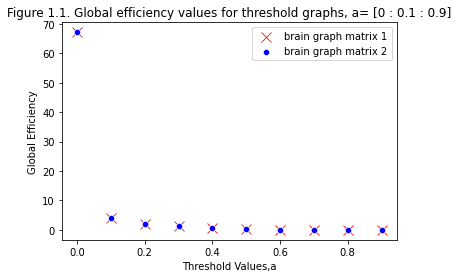

In [213]:
ax=sns.scatterplot(data=GE_B1, x="Threshold", y="Global_Efficiency", color="red", marker='x', s=100, label= 'brain graph matrix 1')
ax=sns.scatterplot(data=GE_B2, x="Threshold", y="Global_Efficiency", color="blue", label= 'brain graph matrix 2')
ax.legend()
plt.ylabel('Global Efficiency')
plt.xlabel('Threshold Values,a')
plt.title('Figure 1.1. Global efficiency values for threshold graphs, a= [0 : 0.1 : 0.9]')
plt.show()

Since the global efficiency value of brain graph matrix without any threshold can be seen kind outliers to the thresholded brain graphs, in order to see the difference in a more clear way, I also plot the global efficiency values by discarding the global efficiency values for the unthresholded graphs

In [210]:
columns=["Global_Efficiency", "Threshold"]
index=[i for i in np.arange(0.1, 1, 0.1)]
GE2_B1=pd.DataFrame(columns=columns, index=index)
for i in range (0,9):
    GE2_B1.iloc[i,0]=globalEfficiency(threshold(A_B1,GE2_B1.index[i]))
    GE2_B1.iloc[i,1]=GE2_B1.index[i]
GE2_B2=pd.DataFrame(columns=columns, index=index)
for i in range (0,9):
    GE2_B2.iloc[i,0]=globalEfficiency(threshold(A_B2,GE2_B2.index[i]))
    GE2_B2.iloc[i,1]=GE2_B2.index[i]

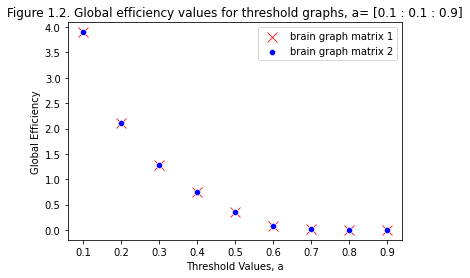

In [211]:
ax=sns.scatterplot(data=GE2_B1, x="Threshold", y="Global_Efficiency", color="red", s=100, marker='x', label= 'brain graph matrix 1')
ax=sns.scatterplot(data=GE2_B2, x="Threshold", y="Global_Efficiency", color="blue", label= 'brain graph matrix 2')
ax.legend()
plt.ylabel('Global Efficiency')
plt.xlabel('Threshold Values, a')
plt.title('Figure 1.2. Global efficiency values for threshold graphs, a= [0.1 : 0.1 : 0.9]')
plt.show()

### 🔺 (2.4) In a second figure, plot the diffusion efficiency Ediff of both matrices against α. [5%]

In [215]:
columns=["Diffusion_Efficiency", "Threshold"]
index=[i for i in np.arange(0, 1, 0.1)]
DE_B1=pd.DataFrame(columns=columns, index=index)
for i in range (0,10):
    DE_B1.iloc[i,0]=diffusionEfficiency(threshold(A_B1,DE_B1.index[i]))
    DE_B1.iloc[i,1]=DE_B1.index[i]
DE_B2=pd.DataFrame(columns=columns, index=index)
for i in range (0,10):
    DE_B2.iloc[i,0]=diffusionEfficiency(threshold(A_B2,DE_B2.index[i]))
    DE_B2.iloc[i,1]=DE_B2.index[i]

/var/folders/vr/x5v7zsw95h50jgx7yhmv13x80000gp/T/ipykernel_73784/524504838.py:19: RuntimeWarning: divide by zero encountered in true_divide
  U=1/(1-U)


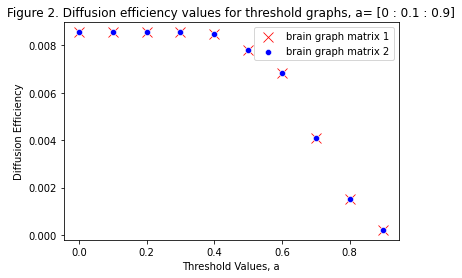

In [216]:
ax=sns.scatterplot(data=DE_B1, x="Threshold", y="Diffusion_Efficiency", color="red", marker='x', s=100, label= 'brain graph matrix 1')
ax=sns.scatterplot(data=DE_B2, x="Threshold", y="Diffusion_Efficiency", color="blue", label= 'brain graph matrix 2')
ax.legend()
plt.ylabel('Diffusion Efficiency')
plt.xlabel('Threshold Values, a')
plt.title('Figure 2. Diffusion efficiency values for threshold graphs, a= [0 : 0.1 : 0.9]')
plt.show()

### 🔺 (2.5) What conclusions can you derive from previous plots? Compare diffusion and global efficiencies within a single graph and across both graphs. [5%]

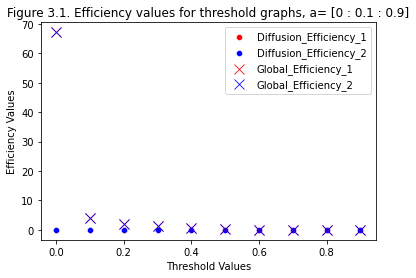

In [217]:
GE_B1["Diffusion_Efficiency"]=DE_B1["Diffusion_Efficiency"]
GE_B2["Diffusion_Efficiency"]=DE_B2["Diffusion_Efficiency"]

ax=sns.scatterplot(data=GE_B1, x="Threshold", y="Diffusion_Efficiency", color="red", label= 'Diffusion_Efficiency_1')
ax=sns.scatterplot(data=GE_B2, x="Threshold", y="Diffusion_Efficiency", color="blue", label= 'Diffusion_Efficiency_2')
ax=sns.scatterplot(data=GE_B1, x="Threshold", y="Global_Efficiency", color="red", marker='x', s=100 , label= 'Global_Efficiency_1')
ax=sns.scatterplot(data=GE_B2, x="Threshold", y="Global_Efficiency", color="blue", marker='x', s=100, label= 'Global_Efficiency_2')
ax.legend()
plt.ylabel('Efficiency Values')
plt.xlabel('Threshold Values')
plt.title('Figure 3.1. Efficiency values for threshold graphs, a= [0 : 0.1 : 0.9]')
plt.show()GE2_B1["Diffusion_Efficiency"]=DE_B1["Diffusion_Efficiency"]
GE2_B2["Diffusion_Efficiency"]=DE_B2["Diffusion_Efficiency"]

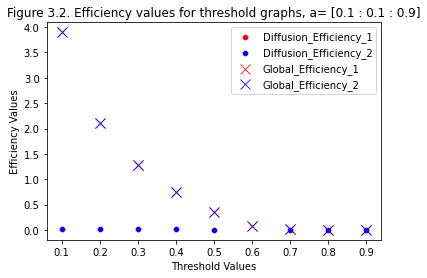

In [218]:
GE2_B1["Diffusion_Efficiency"]=DE_B1["Diffusion_Efficiency"]
GE2_B2["Diffusion_Efficiency"]=DE_B2["Diffusion_Efficiency"]

ax=sns.scatterplot(data=GE2_B1, x="Threshold", y="Diffusion_Efficiency", color="red", label= 'Diffusion_Efficiency_1')
ax=sns.scatterplot(data=GE2_B2, x="Threshold", y="Diffusion_Efficiency", color="blue", label= 'Diffusion_Efficiency_2')
ax=sns.scatterplot(data=GE2_B1, x="Threshold", y="Global_Efficiency", color="red", marker='x', s=100 , label= 'Global_Efficiency_1')
ax=sns.scatterplot(data=GE2_B2, x="Threshold", y="Global_Efficiency", color="blue", marker='x', s=100, label= 'Global_Efficiency_2')
ax.legend()
plt.ylabel('Efficiency Values')
plt.xlabel('Threshold Values')
plt.title('Figure 3.2. Efficiency values for threshold graphs, a= [0.1 : 0.1 : 0.9]')
plt.show()

From plots given through Figure 1.1, 1.2, 2, 3.1, and 3.2, one can provide following comments:

By thresholding given graphs according to the their weighted adjacency matrix, as it is expected, global efficiency values has decreased since the shorter edges are removed one by one results to have longer shortest distance between nodes.

It is seen from both global efficiency and diffusion efficiency results, after theshold value 0.5, the communication within the graphs has damaged significantly.

Thresholding the graphs hasn't affect too much the diffusion efficiency before a certain value, 0.5.

Since global efficiency values have decreased significantly after thresholding for 0.1, it can be concluded that majority of the edges have 0.1 weights in both brain graph 1 and brain graph 2, where it is a bit much more in brain graph 1.

### 🔺 (2.6) Plot a morphospaceb [1] for the set of thresholded brain graphs at α ∈ [0 : 0.1 : 0.9], where the x-axis denotes Ediff and y-axis denotes Eglob. Use two different colors to compare the two thresholded graph sets derived from each brain graph, respectively. [10%]

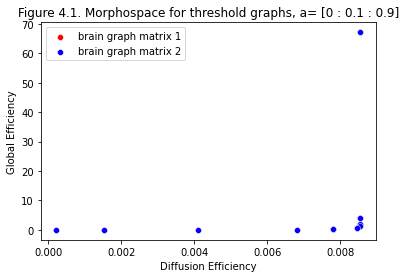

In [219]:
ax=sns.scatterplot(data=GE_B1, x="Diffusion_Efficiency", y="Global_Efficiency", color="red", label= 'brain graph matrix 1')
ax=sns.scatterplot(data=GE_B2, x="Diffusion_Efficiency", y="Global_Efficiency", color="blue", label= 'brain graph matrix 2')
plt.ylabel('Global Efficiency')
plt.xlabel('Diffusion Efficiency')
plt.title('Figure 4.1. Morphospace for threshold graphs, a= [0 : 0.1 : 0.9]')
plt.show()

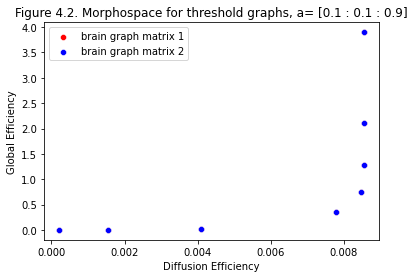

In [220]:
ax=sns.scatterplot(data=GE2_B1, x="Diffusion_Efficiency", y="Global_Efficiency", color="red", label= 'brain graph matrix 1')
ax=sns.scatterplot(data=GE2_B2, x="Diffusion_Efficiency", y="Global_Efficiency", color="blue", label= 'brain graph matrix 2')
plt.ylabel('Global Efficiency')
plt.xlabel('Diffusion Efficiency')
plt.title('Figure 4.2. Morphospace for threshold graphs, a= [0.1 : 0.1 : 0.9]')
plt.show()

### 🔺 (2.7) Discuss the information flow efficiency for both brain graphs based on your morphospace plot. [5%]

From the results visualised with a morphospace in Figure 4.1 and Figure 4.2, it is seen that until a certain threshold value which is known as 0.5 from previous plots, global efficiency has decreased where diffusion efficiency remain likely constant.

For this section, one can say that several linked cluster topology of the graphs are dissolved while still preserving a/some core/cores with perpheral nodes that can be seen as rich-club or core-periphery organization.

After threshold value 0.6, diffusion efficency has decreased as the threshold value increased, where global efficiency remain likely constant. For that section, it can be concluded that from core or star-like structure, graphs have started to have chain or ring like topology.

From the point of information flow efficiency, it is seen that information flow efficiency is decreased by increasing threshold value. Between the threshold values 0.1-0.5, core nodes have showed up, where the information is distributed to the nodes from those core structure, which makes the graphs more vulnerable to targeted attacks. Later on, after the threshold value 0.6, where graphs have long chain or lattice/ring structure, the information flow efficiency gets minimized.

## 3️⃣- Graph self-diffusion for image segmentation [2] [40%]

### 🔺 (3.1) Write a function called selfDiffuse that takes (i) a weighted graph adjacency matrix (i.e., similarity matrix) W and outputs the diffused matrix W⋆ (check algorithm fig:3.). Make sure that your algorithm automatically sets the optimal number of diffusion iterations t⋆ as explained in the paper [2]. [10%]

In [222]:
def selfDiffuse(W):
    D=[]
    for i in range (0, len(W)):
        w=0
        for j in range (0, len(W)):
            w+=W[i][j]
        D.append(w)
    D_1=np.linalg.inv(np.diag(D)) 
    P=np.dot(D_1,W)
    #function to find t optimal
    def t_opt(W,P):
        #the eigenvalues of P matrix in descending order
        vals,vecs= np.linalg.eig(P)
        sort= np.argsort(vals)[::-1]
        vals=vals[sort]
        #first ln 
        wp=np.dot(W,P)
        denom1=len(vals)-P.trace()
        denom2= np.linalg.norm(W-wp-np.identity(len(W)))
        denom=denom1*denom2
        ln1=math.log(0.001/denom) # 0.0001 is selected as small number
        #second ln 
        ln2=math.log(vals[1]-0.05) # C is set to 0.05 as authors indicate that 0.05 found as the best value for C
        t=np.ceil(ln1/ln2)
        #if one wants to check the t_opt, need to run the code below:
        #print(t)
        return int(t)
    #algorithm
    for i in range (0,t_opt(W,P)):
        W=np.dot(W,P)+np.identity(len(W))
    return np.dot(W,D_1)

In [225]:
SF_B1 = selfDiffuse(A_B1)
SF_B2 = selfDiffuse(A_B2)

### 🔺 (3.2) Run selfDiffuse on both brain graph adjacency matrices ‘Exercise 2 data/ brainGraph1.mat’ and ‘Exercise 2 data/ brainGraph2.mat’. For each brain graph, visualize both original and diffused matrices. [10%]

<AxesSubplot:>

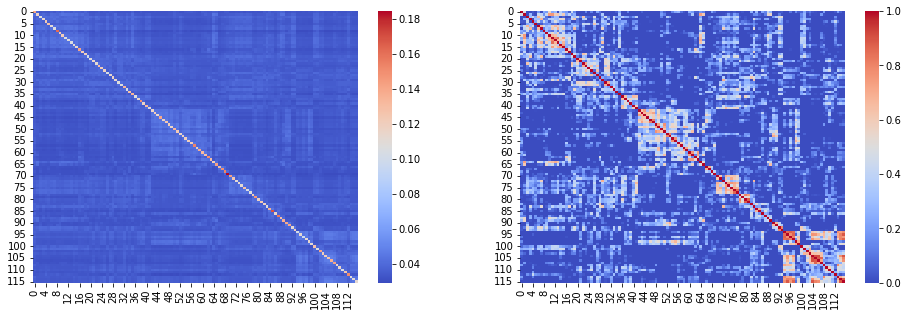

In [226]:
fig= plt.figure(figsize=(16,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
sns.heatmap(pd.DataFrame(SF_B1),cmap="coolwarm", ax=ax1)
sns.heatmap(pd.DataFrame(A_B1),cmap="coolwarm", ax=ax2 )

<AxesSubplot:>

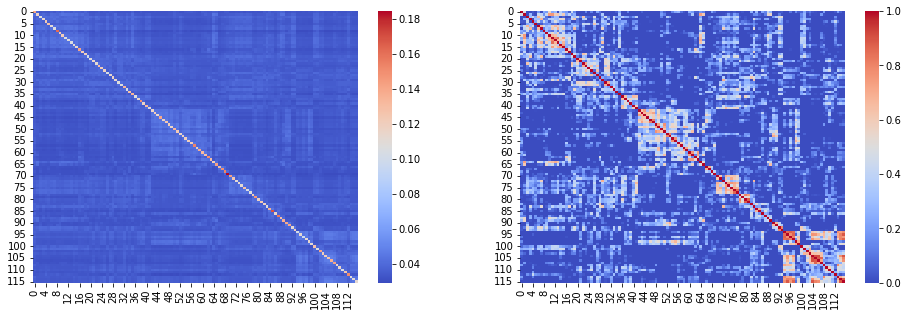

In [227]:
fig= plt.figure(figsize=(16,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
sns.heatmap(pd.DataFrame(SF_B2),cmap="coolwarm", ax=ax1)
sns.heatmap(pd.DataFrame(A_B2),cmap="coolwarm", ax=ax2 )

### 🔺 (3.3) Given the 2 images taken from the Berkeley Segmentation Data Setc, generate the segmentation maps of each image using the Normalized Cut Python code https://github.com/marktao99/python/blob/master/CVP/ samples/ncut.py. Display each original image and its corresponding output segmentation map. [10%]

In [255]:
from PIL import Image
from pylab import *
from numpy import *
from scipy.cluster.vq import *

def cluster(S,k,ndim):
    """ Spectral clustering from a similarity matrix."""
    
    # check for symmetry
    if sum(abs(S-S.T)) > 1e-10:
        print('not symmetric')
    
    # create Laplacian matrix
    rowsum = sum(abs(S),axis=0)
    D = diag(1 / sqrt(rowsum + 1e-6))
    L = dot(D,dot(S,D))
    
    # compute eigenvectors of L
    U,sigma,V = linalg.svd(L,full_matrices=False)
    
    # create feature vector from ndim first eigenvectors
    # by stacking eigenvectors as columns
    features = array(V[:ndim]).T

    # k-means
    features = whiten(features)
    centroids,distortion = kmeans(features,k)
    code,distance = vq(features,centroids)
        
    return code,V

def ncut_graph_matrix(im,sigma_d=1e2,sigma_g=1e-2):
    """ Create matrix for normalized cut. The parameters are 
        the weights for pixel distance and pixel similarity. """
    
    m,n = im.shape[:2] 
    N = m*n
    
    # normalize and create feature vector of RGB or grayscale
    if len(im.shape)==3:
        for i in range(3):
            im[:,:,i] = im[:,:,i] / im[:,:,i].max()
        vim = im.reshape((-1,3))
    else:
        im = im / im.max()
        vim = im.flatten()
    
    # x,y coordinates for distance computation
    xx,yy = meshgrid(range(n),range(m))
    x,y = xx.flatten(),yy.flatten()
    
    # create matrix with edge weights
    W = zeros((N,N),'f')
    for i in range(N):
        for j in range(i,N):
            d = (x[i]-x[j])**2 + (y[i]-y[j])**2 
            W[i,j] = W[j,i] = exp(-1.0*sum((vim[i]-vim[j])**2)/sigma_g) * exp(-d/sigma_d)
    
    return W

In [256]:
#please write the file path of the image file between '()'
im1=Image.open('image1.jpg') #load image here
#image is resized in order to deal with the memory limit
im1 = im1.resize((int(list(im1.size)[0]/8),int(list(im1.size)[1]/8)),Image.NEAREST)

In [257]:
#affinity matrix obtained by N-cut algorithm
W_Ncut1 = ncut_graph_matrix(np.asarray(im1).astype(np.float32))

In [248]:
#clusters from affinity matrix in order to label each pixel
#Two cluster is prefered since the image can be represented by two colors
l1, V =cluster(W_Ncut1,2,1)
l2, V =cluster(W_Ncut1,3,2)
l3, V =cluster(W_Ncut1,4,3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


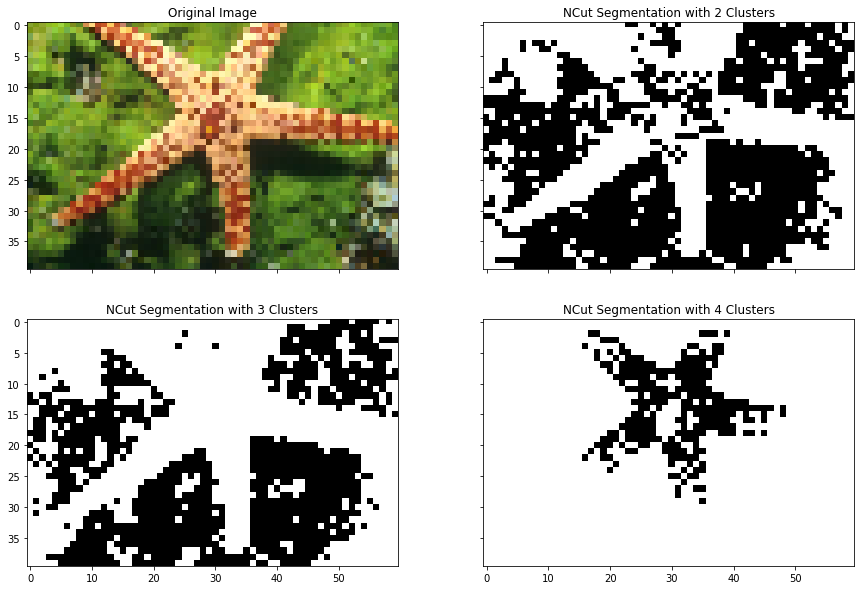

In [249]:
m1,n1 = np.array(im1).shape[:2]
#labels are reshaped according to the shape of the image
labels_1=np.array(l1).reshape(m1,n1)
labels_2=np.array(l2).reshape(m1,n1)
labels_3=np.array(l3).reshape(m1,n1)

segmentation_1 = color.label2rgb(labels_1, np.array(im1), kind='avg', bg_label=0)
segmentation_2 = color.label2rgb(labels_2, np.array(im1), kind='avg', bg_label=0)
segmentation_3 = color.label2rgb(labels_3, np.array(im1), kind='avg', bg_label=0)
fig, ax = plt.subplots(nrows= 2, ncols=2, sharex=True, sharey=True, figsize=(15, 10))
ax[0][0].set_title('Original Image')
ax[0][0].imshow(im1)
ax[0][1].set_title('NCut Segmentation with 2 Clusters')
ax[0][1].imshow(segmentation_1)
ax[1][0].set_title('NCut Segmentation with 3 Clusters')
ax[1][0].imshow(segmentation_2)
ax[1][1].set_title('NCut Segmentation with 4 Clusters')
ax[1][1].imshow(segmentation_3)
plt.show()

In [250]:
im2=Image.open('image2.jpg')#load image here
im2 = im2.resize((int(list(im2.size)[0]/8),int(list(im2.size)[1]/8)),Image.NEAREST)

In [251]:
W_Ncut2=ncut_graph_matrix(np.asarray(im2).astype(np.float32))


In [252]:
#clusters from affinity matrix in order to label each pixel
#Two cluster is prefered since the image can be represented by two colors
l1, V =cluster(W_Ncut2,5,4)
l2, V =cluster(W_Ncut2,7,6)
l3, V =cluster(W_Ncut2,12,11)

In [253]:
m1,n1 = np.array(im2).shape[:2]
#labels are reshaped according to the shape of the image
labels_1=np.array(l1).reshape(m1,n1)
labels_2=np.array(l2).reshape(m1,n1)
labels_3=np.array(l3).reshape(m1,n1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


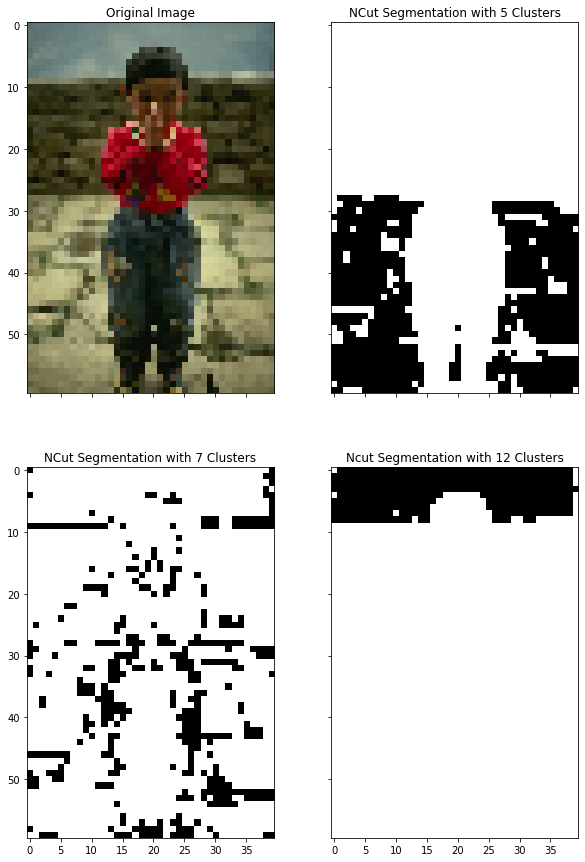

In [254]:
segmentation_1 = color.label2rgb(labels_1, np.array(im2), kind='avg', bg_label=0)
segmentation_2 = color.label2rgb(labels_2, np.array(im2), kind='avg', bg_label=0)
segmentation_3 = color.label2rgb(labels_3, np.array(im2), kind='avg', bg_label=0)
fig, ax = plt.subplots(nrows= 2, ncols=2, sharex=True, sharey=True, figsize=(10, 15))
ax[0][0].set_title('Original Image')
ax[0][0].imshow(im2)
ax[0][1].set_title('NCut Segmentation with 5 Clusters')
ax[0][1].imshow(segmentation_1)
ax[1][0].set_title('NCut Segmentation with 7 Clusters')
ax[1][0].imshow(segmentation_2)
ax[1][1].set_title('Ncut Segmentation with 12 Clusters')
ax[1][1].imshow(segmentation_3)
plt.show()

### 🔺 (3.4) For each image, change the Normalized Cut Python by applying self- Diffuse to the similarity matrix W, then use W⋆ to perform the normalized cut and output the image segmentation map. For each image, display 5 differ- ent normalized cut segmentation maps when varying the diffusion threshold fromt=1tot=2×t⋆ (similartoFig1in[2]andFigfig:4below).[10%]